### 1.Introduction

#### Description
Chicago is also know as City of Chicago and is most populous city of Illinois and is third most populous city in the United States.With and estimated population of 2,716,450 for the year 2017.the city covers and area of 60,000 hectares .There are 77 geographical divisions in Chicago know as community areas with each area having its own neighborhoods in total 100 neighborhoods. Chicago is an international hub for finance,culture,commerce,industry,technology,telecommunications and transportation.O'Hire is one of the busiest International airports in the world and the region also has largest number U.S highways and greatest amounts of railroad freights.The Chicago city has one of the highest Gross domestic products(GDP) in the world generating $680 billion in 2017.Chicago's 58 million domestic and international visitors in 2018 made it second most visited in the nation,behind New York city's approximate 65 million visitors .

#### Background
City of Chicago is a large scope for new establishments in various business areas such as Restaurants, Hotels,Residential,Cafe etc.

From the Investor point of view, which is/are the best neighborhoods for the new establishments.One of the key factors that contribute most profitable that standout is Crime rates in addition to other factors such as visibility , parking , space , competitors , accessibility and Safety.Lesser the Crime rate in the neighborhood more people tend to visit the place.

### 2.Data Description

Considering the Problem background,Create Chicago Map with Crime rate index and clustering neighborhood venues.

City of Chicago maintains public data repository for Crime incident dataset "Crimes - 2001 to 2018".I used this dataset to create crime rates based on incident type and community area number.

Used wikipedia for Chicago Community area and its neighborhood list at "https://en.wikipedia.org/wiki/Community_areas_in_Chicago" to collect the data and applied Geopy Nominatim to get the Latitude and Longitude for each Community area.

Used Foursquare API for most common venues for each Community area neighborhoods.

Used folium packages to use the Neighborhoods on Map.

### 3.Methodology

In this section exploring the datasets of Chicago_Crimes_2001_2018.csv and Chicago_community_area_v1.csv to answers the factors as in the introduction section.Once Datasets are analyzed then apply Foursquare API to fetch the Neighborhood Venues.Further thee Neighborhoods are segmented and Clustered using KMeans Algorithm.The combined results will influence the Recommendation for new Establishments in Neighbourhoods where there are lower Crime Rates.

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

!conda install -c conda-forge folium --yes

import folium
import requests # library to handle JSON files
import json
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings("ignore")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.8.3               |             py_0          54 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be IN

### 3.1 Analyzie Chicago Crime Data

Read Crime Data which is stored in IBM Cloud Object Storage

In [3]:
# The code was removed by Watson Studio for sharing.

#### Access to data file in IBM cloud Object storage includes Private credentials and hence the above cell is not visible for security reasons

In [4]:
Chicago_Crime_data = pd.read_csv(body)
Chicago_Crime_data.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [5]:
Chicago_Crime_data.columns

Index(['ID', 'CASE_NUMBER', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY_TYPE',
       'DESCRIPTION', 'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT',
       'DISTRICT', 'WARD', 'COMMUNITY_AREA_NUMBER', 'FBICODE', 'X_COORDINATE',
       'Y_COORDINATE', 'YEAR', 'UPDATEDON', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

Most important features for Crime data in this analysis are District,community_area_number,Year,Primary_type(incident type) and coordinates.So Including only these features

In [6]:
cols = ['DISTRICT','COMMUNITY_AREA_NUMBER','PRIMARY_TYPE','X_COORDINATE','Y_COORDINATE', 'YEAR','LATITUDE', 'LONGITUDE','LOCATION']

Crime_data = Chicago_Crime_data[cols]
Crime_data.shape

(533, 9)

In [7]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 9 columns):
DISTRICT                 533 non-null int64
COMMUNITY_AREA_NUMBER    490 non-null float64
PRIMARY_TYPE             533 non-null object
X_COORDINATE             529 non-null float64
Y_COORDINATE             529 non-null float64
YEAR                     533 non-null int64
LATITUDE                 529 non-null float64
LONGITUDE                529 non-null float64
LOCATION                 529 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 37.6+ KB


Check for NaN's in Dataset and drop if any

In [8]:
Crime_data[Crime_data.isnull().any(axis=1)].shape

(46, 9)

Dropping NaN rows 

In [9]:
Crime_data.dropna(inplace=True)
Crime_data.isnull().sum()

DISTRICT                 0
COMMUNITY_AREA_NUMBER    0
PRIMARY_TYPE             0
X_COORDINATE             0
Y_COORDINATE             0
YEAR                     0
LATITUDE                 0
LONGITUDE                0
LOCATION                 0
dtype: int64

Change the data type of community_area_number from float to int to match with data type in Chicago_community's dataset

In [10]:
Crime_data.COMMUNITY_AREA_NUMBER = Crime_data.COMMUNITY_AREA_NUMBER.astype(int)

In [11]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 531
Data columns (total 9 columns):
DISTRICT                 487 non-null int64
COMMUNITY_AREA_NUMBER    487 non-null int64
PRIMARY_TYPE             487 non-null object
X_COORDINATE             487 non-null float64
Y_COORDINATE             487 non-null float64
YEAR                     487 non-null int64
LATITUDE                 487 non-null float64
LONGITUDE                487 non-null float64
LOCATION                 487 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 38.0+ KB


Now Get the list of Incident Type(Primary Type)

In [12]:
Crime_data.PRIMARY_TYPE.unique()

array(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'PROSTITUTION', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'ARSON', 'HOMICIDE', 'KIDNAPPING',
       'INTIMIDATION', 'STALKING', 'OBSCENITY',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY',
       'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING',
       'NON - CRIMINAL', 'RITUALISM', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

Non Criminal type is differntly typed and these are not necessary for our analysis.So remove these types

In [13]:
non_criminal = ['NON-CRIMINAL','NON - CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)']
Crime_data = Crime_data[~Crime_data['PRIMARY_TYPE'].isin(non_criminal)].reset_index(drop=True)

Add District Names to the numbers

In [14]:
Crime_data.DISTRICT.unique()

array([ 9, 11,  2,  4,  8, 12, 17, 22,  1, 14,  6, 15, 18,  3,  7, 16, 19,
       10, 25, 20, 24,  5])

In [15]:
district = {1:'Central',
            2:'Wentworth',
            3:'Grand Crossing',
            4:'South Chicago',
            5:'Calumet',
            6:'Gresham',
            7:'Englewood',
            8:'Chicago Lawn',
            9:'Deering',
            10:'Ogden',
            11:'Harrison',
            12:'Near West',
            13:'Unknown',
            14:'Shakespeare',
            15:'Austin',
            16:'Jefferson Park',
            17:'Albany Park',
            18:'Near North',
            19:'Town Hall',
            20:'Lincoln',
            21:'Unknown',
            22:'Morgan Park',
            23:'Unknowk',
            24:'Rogers Park',
            25:'Grand Central'
            }

Crime_data['DISTRICT_NAME'] = Crime_data.DISTRICT.map(district)
Crime_data.DISTRICT_NAME.unique()

array(['Deering', 'Harrison', 'Wentworth', 'South Chicago', 'Chicago Lawn',
       'Near West', 'Albany Park', 'Morgan Park', 'Central', 'Shakespeare',
       'Gresham', 'Austin', 'Near North', 'Grand Crossing', 'Englewood',
       'Jefferson Park', 'Town Hall', 'Ogden', 'Grand Central', 'Lincoln',
       'Rogers Park', 'Calumet'], dtype=object)

#### Visualize Crime data
1. By district

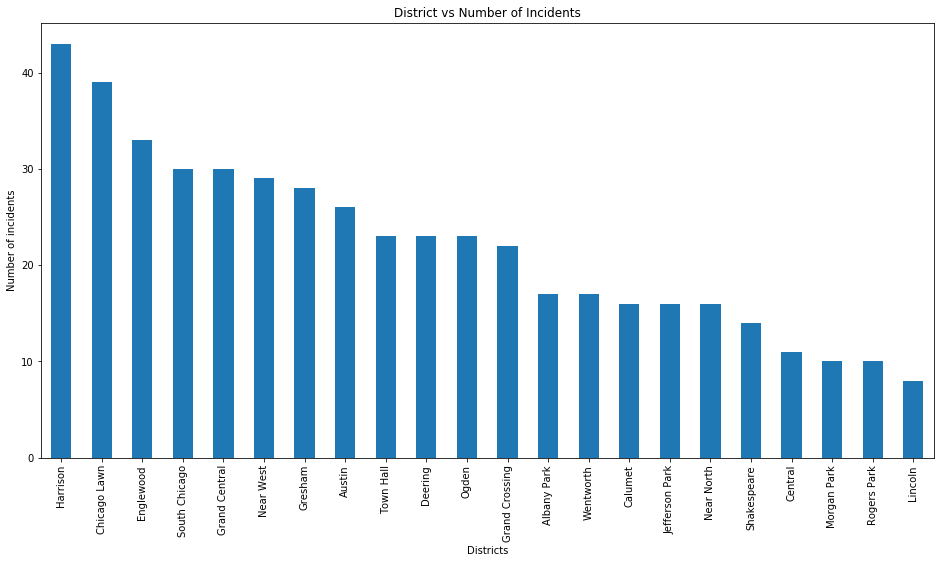

In [16]:
Crime_PoliceDistrict = pd.DataFrame(Crime_data.DISTRICT_NAME.value_counts(ascending=False).astype(int))
Crime_PoliceDistrict = Crime_PoliceDistrict.reset_index()
Crime_PoliceDistrict.columns=['District','Num_of_Incidents']
Crime_PoliceDistrict.plot(kind='bar',figsize=(16,8),legend=None)
xticks = [i for i in range(len(Crime_PoliceDistrict))]
plt.xticks(xticks, list(Crime_PoliceDistrict['District']))
plt.xlabel('Districts')
plt.ylabel('Number of incidents')
plt.title('District vs Number of Incidents')
plt.show()

Harrison and Chicago Lawn have higest number of incidents than followed by Englewood and the leasr is Lincoln

2. By Incident Type(Primary_Type)

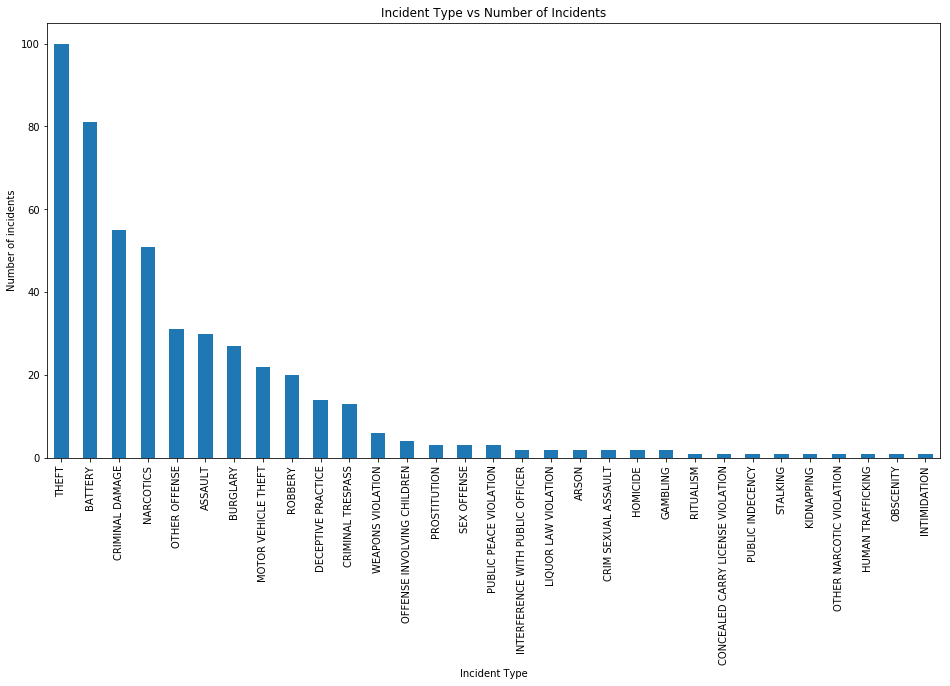

In [17]:
Crime_PrimaryType = pd.DataFrame(Crime_data.PRIMARY_TYPE.value_counts(ascending=False).astype(int))
Crime_PrimaryType = Crime_PrimaryType.reset_index()
Crime_PrimaryType.columns=['IncidentType','Num_of_Incidents']
Crime_PrimaryType.plot(kind='bar',figsize=(16,8),legend=None)
xticks = [i for i in range(len(Crime_PrimaryType))]
plt.xticks(xticks, list(Crime_PrimaryType['IncidentType']))
plt.xlabel('Incident Type')
plt.ylabel('Number of incidents')
plt.title('Incident Type vs Number of Incidents')
plt.show()

Theft and Battery are most incident types that occurs followed by Criminal damage and Narcotics

3.By Community Area

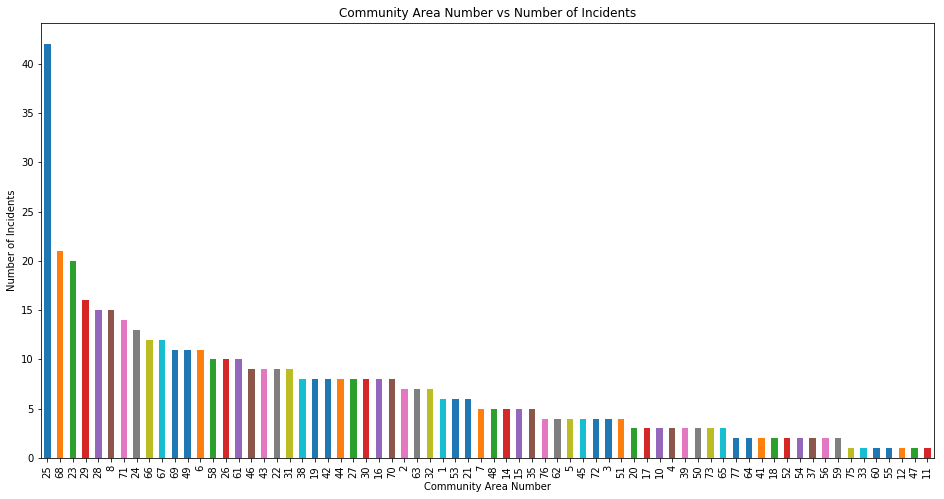

In [18]:
Crime_data.COMMUNITY_AREA_NUMBER.value_counts().plot(kind='bar',figsize=(16,8))
plt.xlabel('Community Area Number')
plt.ylabel('Number of Incidents')
plt.title('Community Area Number vs Number of Incidents')
plt.show()

Community Area 25 (Austin) is the highest among all the areas reported.

4. By Year

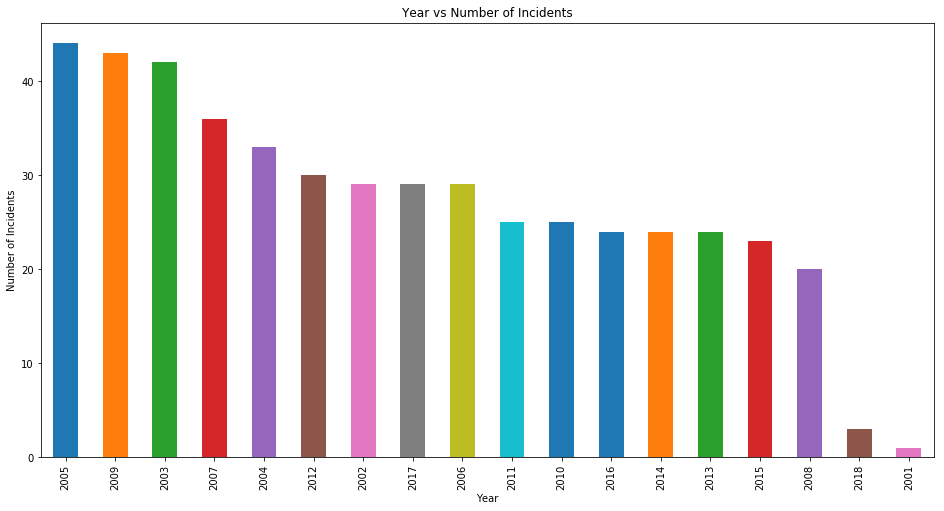

In [19]:
Crime_data.YEAR.value_counts().plot(kind='bar',figsize=(16,8))
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Year vs Number of Incidents')
plt.show()

Year 2005,2009 and 2003 are highest among all and 2001 is least.

### Lets check Chicago Community Area dataset

In [24]:
# The code was removed by Watson Studio for sharing.

In [25]:
Chicago_ca_temp = pd.read_csv(body)
Chicago_ca_temp.head()

,Unnamed: 0,COMMUNITY_ARE_NUMBER,COMMUNITY_AREA,Neighborhoods,Pri_Neigh,Pri_Neigh_1,Latitude,Longitude,ca_Latitude_USA,ca_Longitude_USA
0,0,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini–Green,Cabrini Green,41.898805,-87.640937,41.900033,-87.634497
1,1,32,Loop,"Loop,New Eastside,South Loop,West Loop Gate",Loop,Loop,41.875562,-87.624421,41.881609,-87.629457
2,2,33,Near South Side,"Dearborn Park,Printer's Row,South Loop,Prairie...",Dearborn Park,Dearborn Park,41.866553,-87.628954,41.856700,-87.624774
3,3,5,North Center,"Horner Park,Roscoe Village",Horner Park,Horner Park,41.957682,-87.696408,41.956107,-87.679160
4,4,6,Lake View,"Boystown,Lake View East,Graceland West,South E...",Boystown,Boystown,41.943883,-87.649267,41.885382,-87.627908


In [26]:
Chicago_ca_temp.columns

Index(['Unnamed: 0', 'COMMUNITY_ARE_NUMBER', 'COMMUNITY_AREA', 'Neighborhoods',
       'Pri_Neigh', 'Pri_Neigh_1', 'Latitude', 'Longitude', 'ca_Latitude_USA',
       'ca_Longitude_USA'],
      dtype='object')

In [27]:
ca_cols=['COMMUNITY_ARE_NUMBER', 'COMMUNITY_AREA', 'Neighborhoods','Pri_Neigh_1', 'Latitude', 'Longitude', 'ca_Latitude_USA',
       'ca_Longitude_USA']

temp = Chicago_ca_temp[ca_cols]

In [28]:
temp.head()

temp.rename(columns={'Latitude':'ng_Latitude','Longitude':'ng_Longitude','COMMUNITY_ARE_NUMBER':'COMMUNITY_AREA_NUMBER'},inplace=True)
temp.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA', 'Neighborhoods',
       'Pri_Neigh_1', 'ng_Latitude', 'ng_Longitude', 'ca_Latitude_USA',
       'ca_Longitude_USA'],
      dtype='object')

Merge temp with Crime_data on Community_area_number


In [29]:
merged_data=temp.merge(Crime_data,on='COMMUNITY_AREA_NUMBER')
merged_data.isnull().sum()

COMMUNITY_AREA_NUMBER    0
COMMUNITY_AREA           0
Neighborhoods            0
Pri_Neigh_1              0
ng_Latitude              0
ng_Longitude             0
ca_Latitude_USA          0
ca_Longitude_USA         0
DISTRICT                 0
PRIMARY_TYPE             0
X_COORDINATE             0
Y_COORDINATE             0
YEAR                     0
LATITUDE                 0
LONGITUDE                0
LOCATION                 0
DISTRICT_NAME            0
dtype: int64

In [30]:
merged_data.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA,Neighborhoods,Pri_Neigh_1,ng_Latitude,ng_Longitude,ca_Latitude_USA,ca_Longitude_USA,DISTRICT,PRIMARY_TYPE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION,DISTRICT_NAME
0,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,41.898805,-87.640937,41.900033,-87.634497,18,THEFT,1177338.0,1906213.0,2015,41.897983,-87.624096,"(41.897982937, -87.624095634)",Near North
1,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,41.898805,-87.640937,41.900033,-87.634497,18,THEFT,1175504.0,1908078.0,2006,41.903142,-87.630776,"(41.903141995, -87.63077557)",Near North
2,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,41.898805,-87.640937,41.900033,-87.634497,18,THEFT,1176302.0,1903096.0,2015,41.889453,-87.627995,"(41.889453169, -87.627994833)",Near North
3,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,41.898805,-87.640937,41.900033,-87.634497,18,THEFT,1177533.0,1903942.0,2005,41.891747,-87.623448,"(41.891746779, -87.623448439)",Near North
4,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,41.898805,-87.640937,41.900033,-87.634497,18,BATTERY,1174938.0,1907711.0,2004,41.902148,-87.632866,"(41.90214763, -87.632865587)",Near North


In [31]:
merged_data.columns
incident_cols=['DISTRICT','DISTRICT_NAME','COMMUNITY_AREA','Neighborhoods','Pri_Neigh_1','LOCATION']
neigh_incidents=merged_data[incident_cols]

In [32]:
neigh_incidents.head()

,DISTRICT,DISTRICT_NAME,COMMUNITY_AREA,Neighborhoods,Pri_Neigh_1,LOCATION
0,18,Near North,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,"(41.897982937, -87.624095634)"
1,18,Near North,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,"(41.903141995, -87.63077557)"
2,18,Near North,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,"(41.889453169, -87.627994833)"
3,18,Near North,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,"(41.891746779, -87.623448439)"
4,18,Near North,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",Cabrini Green,"(41.90214763, -87.632865587)"


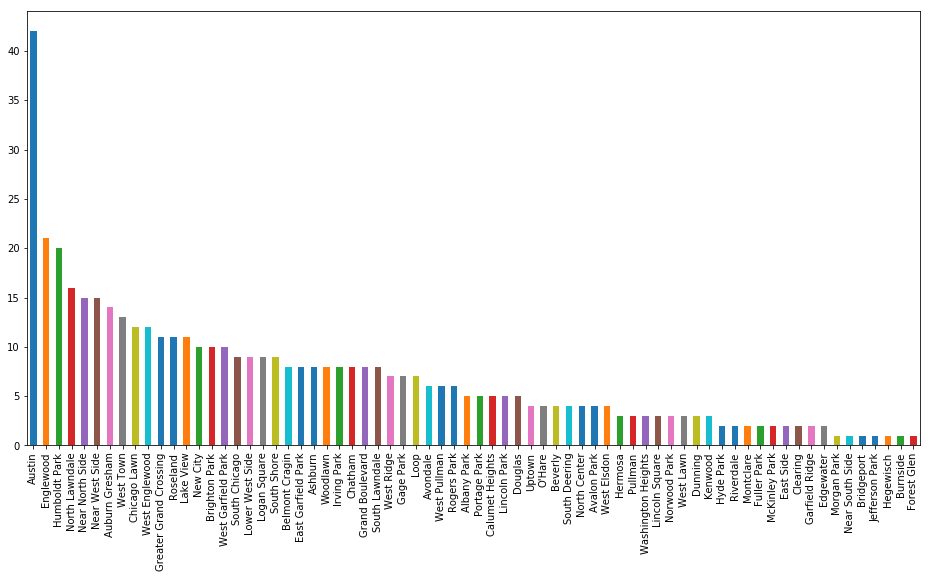

In [33]:
neigh_incidents.COMMUNITY_AREA.value_counts().plot(kind='bar',figsize=(16,8))

In [34]:
# Create Crime Rate Dataframe
Neigh_crime_count = pd.DataFrame(neigh_incidents.groupby(['Pri_Neigh_1'])['DISTRICT'].count().reset_index())
Neigh_crime_count.rename(columns={'DISTRICT':'Incident_Count'},inplace=True)
tmp_loc = neigh_incidents.groupby(['Pri_Neigh_1'])['LOCATION'].min().reset_index()
lt=[]
lg=[]
for index,row in tmp_loc.iterrows():
    tmp=str(row[1]).strip('()').split(',')
    #print(tmp)
    lt.append(tmp[0])
    lg.append(tmp[1])

Neigh_crime_count['Latitude']=lt
Neigh_crime_count['Longitude']=lg

Neigh_crime_count.shape

(67, 4)

In [35]:
Neigh_crime_count.rename(columns={'Pri_Neigh_1':'Neighborhood'},inplace=True)
Neigh_crime_count.head()

,Neighborhood,Incident_Count,Latitude,Longitude
0,Altgeld Gardens,2,41.653710537,-87.609528714
1,Andersonville,2,41.981153152,-87.669750197
2,Arcadia Terrace,7,41.986760917,-87.698624808
3,Auburn Gresham,14,41.736296397,-87.64036804
4,Avalon Park,4,41.736930377,-87.584391221


In [36]:
Neigh_crime_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
Neighborhood      67 non-null object
Incident_Count    67 non-null int64
Latitude          67 non-null object
Longitude         67 non-null object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


In [37]:
# convert Data type of Lattitude and Longitude to Float

Neigh_crime_count.Latitude = Neigh_crime_count.Latitude.astype(float)
Neigh_crime_count.Longitude = Neigh_crime_count.Longitude.astype(float)

In [41]:
Neigh_crime_count.head()

,Neighborhood,Incident_Count,Latitude,Longitude
0,Altgeld Gardens,2,41.653711,-87.609529
1,Andersonville,2,41.981153,-87.669750
2,Arcadia Terrace,7,41.986761,-87.698625
3,Auburn Gresham,14,41.736296,-87.640368
4,Avalon Park,4,41.736930,-87.584391


### __3.2 Exploring and clustering Venues in Chicago Neighborhoods__

__Using Foursquare API to explore Chicago Neighborhood ,Segment and cluster using K-Mean Algorithm__

In [42]:
# The code was removed by Watson Studio for sharing.

In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Get Nearby Neighborhood Venues

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
Chicago_venues = getNearbyVenues(names=Neigh_crime_count['Neighborhood'],
                                   latitudes=Neigh_crime_count['Latitude'],
                                   longitudes=Neigh_crime_count['Longitude']
                                  )

In [46]:
Chicago_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altgeld Gardens,41.653711,-87.609529,Skipper's Marina,41.650474,-87.607860,Harbor / Marina
1,Andersonville,41.981153,-87.669750,First Slice Pie Café,41.979819,-87.669500,Pie Shop
2,Andersonville,41.981153,-87.669750,The Brown Elephant,41.980193,-87.668672,Thrift / Vintage Store
3,Andersonville,41.981153,-87.669750,A Taste of Heaven,41.979873,-87.668305,Breakfast Spot
4,Andersonville,41.981153,-87.669750,Calo Ristorante,41.979427,-87.668237,Italian Restaurant


Find out the number of unique Venue Categories returned

In [47]:
print("There are {} Unique Venue Cagegories ".format(len(Chicago_venues['Venue Category'].unique())))

There are 237 Unique Venue Cagegories 


__Clustering the neighborhoods using k-means algorithm__  
__Preprocessing__

First have to one-hot encode venue Categories

In [48]:
# one hot encoding
Chicago_onehot = pd.get_dummies(Chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Chicago_onehot['Neighborhood'] = Chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Chicago_onehot.columns[-1]] + list(Chicago_onehot.columns[:-1])
Chicago_onehot = Chicago_onehot[fixed_columns]

Chicago_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Altgeld Gardens,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Andersonville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Andersonville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andersonville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Andersonville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Chicago_onehot.shape

(1402, 238)

Now group the neighborhood and take the mean of the frequency of each venue category

In [50]:
Chicago_grouped = Chicago_onehot.groupby(['Neighborhood']).mean().reset_index()
Chicago_grouped.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Altgeld Gardens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,Andersonville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.000000,0.0,0.0
2,Arcadia Terrace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,Auburn Gresham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,Avalon Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.038462,0.0,0.0


Lets sort the venues in desending order for top n venues

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now create a Dataframe for top 10 venues in descending order

In [52]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Chicago_grouped['Neighborhood']

for ind in np.arange(Chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altgeld Gardens,Harbor / Marina,Yoga Studio,Event Space,Food Service,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market
1,Andersonville,Italian Restaurant,Coffee Shop,Breakfast Spot,Lounge,Restaurant,Burger Joint,Mexican Restaurant,Café,Antique Shop,Sandwich Place
2,Arcadia Terrace,Sushi Restaurant,Bakery,Gym,Korean Restaurant,Currency Exchange,Donut Shop,Fondue Restaurant,Middle Eastern Restaurant,Cajun / Creole Restaurant,Baseball Field
3,Auburn Gresham,Insurance Office,Clothing Store,Shopping Mall,Liquor Store,Train Station,Sandwich Place,Seafood Restaurant,Dessert Shop,Event Space,Food
4,Avalon Park,Fast Food Restaurant,Discount Store,Pharmacy,Dry Cleaner,Sandwich Place,Ice Cream Shop,Cosmetics Shop,Southern / Soul Food Restaurant,Fried Chicken Joint,Café


In [53]:
neighborhoods_venues_sorted.shape

(67, 11)

Now apply K-Mean algorithm

In [54]:
# Set the number of clusters
kclusters = 5

Chicago_grouped_clustering = Chicago_grouped.drop('Neighborhood', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=34).fit(Chicago_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

Create a Dataframe that includes clusters with top 10 venues as well as Crime incidents

In [55]:
# Create the dataframe
Chicago_merged = neighborhoods_venues_sorted

# Add clustering labels
Chicago_merged['Cluster Labels'] = kmeans.labels_

# Merge Neigh_crim_count with  neighborhood_venues_sorted to add Incident_count ,latitude/longitude for each neighborhood
Chicago_merged = Neigh_crime_count.join(neighborhoods_venues_sorted.set_index('Neighborhood'),on='Neighborhood')


Chicago_merged.head()

,Neighborhood,Incident_Count,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Altgeld Gardens,2,41.653711,-87.609529,Harbor / Marina,Yoga Studio,Event Space,Food Service,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,3
1,Andersonville,2,41.981153,-87.669750,Italian Restaurant,Coffee Shop,Breakfast Spot,Lounge,Restaurant,Burger Joint,Mexican Restaurant,Café,Antique Shop,Sandwich Place,4
2,Arcadia Terrace,7,41.986761,-87.698625,Sushi Restaurant,Bakery,Gym,Korean Restaurant,Currency Exchange,Donut Shop,Fondue Restaurant,Middle Eastern Restaurant,Cajun / Creole Restaurant,Baseball Field,4
3,Auburn Gresham,14,41.736296,-87.640368,Insurance Office,Clothing Store,Shopping Mall,Liquor Store,Train Station,Sandwich Place,Seafood Restaurant,Dessert Shop,Event Space,Food,4
4,Avalon Park,4,41.736930,-87.584391,Fast Food Restaurant,Discount Store,Pharmacy,Dry Cleaner,Sandwich Place,Ice Cream Shop,Cosmetics Shop,Southern / Soul Food Restaurant,Fried Chicken Joint,Café,4


In [56]:
# Check unique clusters
Chicago_merged['Cluster Labels'].unique()

array([3, 4, 1, 0, 2])

In [57]:
# check the data types
Chicago_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 15 columns):
Neighborhood              67 non-null object
Incident_Count            67 non-null int64
Latitude                  67 non-null float64
Longitude                 67 non-null float64
1st Most Common Venue     67 non-null object
2nd Most Common Venue     67 non-null object
3rd Most Common Venue     67 non-null object
4th Most Common Venue     67 non-null object
5th Most Common Venue     67 non-null object
6th Most Common Venue     67 non-null object
7th Most Common Venue     67 non-null object
8th Most Common Venue     67 non-null object
9th Most Common Venue     67 non-null object
10th Most Common Venue    67 non-null object
Cluster Labels            67 non-null int32
dtypes: float64(2), int32(1), int64(1), object(11)
memory usage: 7.7+ KB


### __Now Visualize resulting clusters__

In [58]:
#Get the address coordinates of Chicago,IL using Geopy Nominatim
address = 'Chicago,IL'

geolocator = Nominatim(user_agent="Chicago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago,IL are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago,IL are 41.8755616, -87.6244212.


In [79]:
# create map for Chicago and its neighborhoods
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
#markers_colors = []
for lat, lon, poi, cluster,incidents in zip(Chicago_merged['Latitude'], Chicago_merged['Longitude'], Chicago_merged['Neighborhood'], Chicago_merged['Cluster Labels'],Chicago_merged['Incident_Count']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster) + ', Crime Rate:' + str(incidents), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


## 4. Results

__The Proposed Location for New establishment based on Lowest crime rates less than 5 are most common in multiple neighborhoods as per below__

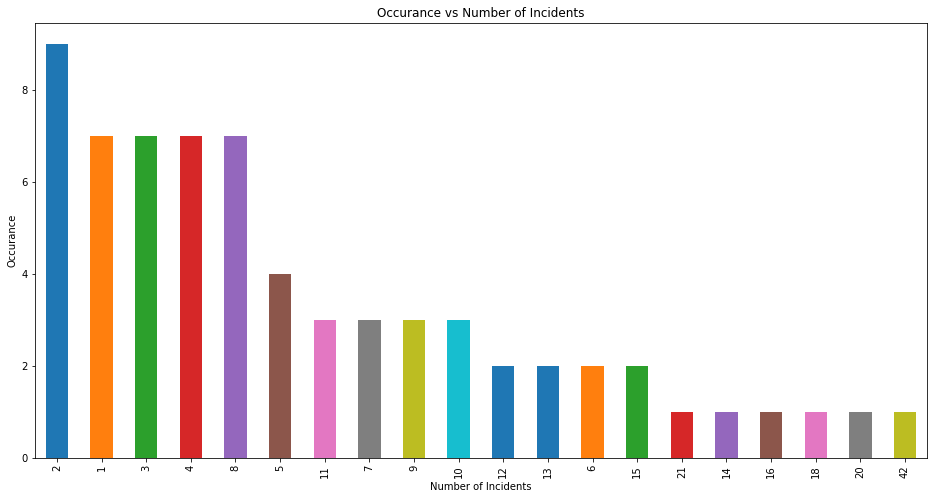

In [60]:
Chicago_merged['Incident_Count'].value_counts().plot(kind='bar',figsize=(16,8))
plt.xlabel("Number of Incidents")
plt.ylabel("Occurance")
plt.title("Occurance vs Number of Incidents")
plt.show()


#### Define a function to examine clusters

In [61]:
def examine_clusters(id):
    return Chicago_merged.loc[Chicago_merged['Cluster Labels'] == id, Chicago_merged.columns[[0] + [1] + list(range(5, Chicago_merged.shape[1]))]]

#### Cluster 1

In [62]:
examine_clusters(0)

,Neighborhood,Incident_Count,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
28,East Side,2,Video Store,Yoga Studio,Food Service,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,0


#### Cluster 2

In [63]:
examine_clusters(1)

,Neighborhood,Incident_Count,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
22,Chrysler Village,2,Construction & Landscaping,Pizza Place,Video Store,American Restaurant,Mexican Restaurant,Fried Chicken Joint,Chinese Restaurant,Pharmacy,Convenience Store,1
33,Fifth City,8,Comfort Food Restaurant,Mexican Restaurant,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,1
36,Gage Park,7,IT Services,Food & Drink Shop,Food,Mexican Restaurant,Electronics Store,Fast Food Restaurant,Food Truck,Food Service,Food Court,1
38,Gladstone Park,1,Bar,Pub,New American Restaurant,Spanish Restaurant,Athletics & Sports,Train Station,Martial Arts Dojo,Shopping Mall,Sushi Restaurant,1
40,Greektown,15,Park,Mexican Restaurant,Bar,BBQ Joint,Liquor Store,Pizza Place,Beer Bar,Rock Club,New American Restaurant,1
42,Heart of Chicago,9,Bar,Pizza Place,Taco Place,Chinese Restaurant,Grocery Store,Art Gallery,Supermarket,Video Store,Sandwich Place,1
49,Lawndale,16,Mexican Restaurant,Donut Shop,Park,Yoga Studio,Fast Food Restaurant,Food Court,Food & Drink Shop,Food,Fondue Restaurant,1
55,McKinley Park,2,Burger Joint,Pharmacy,Video Store,Flower Shop,Grocery Store,Pub,Fondue Restaurant,Food,Event Space,1
56,Montclare,2,Convenience Store,Dive Bar,Home Service,Food Truck,Department Store,Field,Food Service,Food Court,Food & Drink Shop,1
61,The Bush,9,Mexican Restaurant,Italian Restaurant,Train Station,Park,Pizza Place,Convenience Store,American Restaurant,Fondue Restaurant,Food,1


#### Cluster 3

In [64]:
examine_clusters(2)

,Neighborhood,Incident_Count,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
63,West Englewood,12,Yoga Studio,Convenience Store,Food Service,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,2


#### Cluster 4

In [65]:
examine_clusters(3)

,Neighborhood,Incident_Count,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Altgeld Gardens,2,Yoga Studio,Event Space,Food Service,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,3


#### Cluster 5

In [66]:
examine_clusters(4)

,Neighborhood,Incident_Count,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
1,Andersonville,2,Coffee Shop,Breakfast Spot,Lounge,Restaurant,Burger Joint,Mexican Restaurant,Café,Antique Shop,Sandwich Place,4
2,Arcadia Terrace,7,Bakery,Gym,Korean Restaurant,Currency Exchange,Donut Shop,Fondue Restaurant,Middle Eastern Restaurant,Cajun / Creole Restaurant,Baseball Field,4
3,Auburn Gresham,14,Clothing Store,Shopping Mall,Liquor Store,Train Station,Sandwich Place,Seafood Restaurant,Dessert Shop,Event Space,Food,4
4,Avalon Park,4,Discount Store,Pharmacy,Dry Cleaner,Sandwich Place,Ice Cream Shop,Cosmetics Shop,Southern / Soul Food Restaurant,Fried Chicken Joint,Café,4
5,Avondale Gardens,8,Breakfast Spot,Italian Restaurant,Farmers Market,Chinese Restaurant,Latin American Restaurant,Park,New American Restaurant,Nail Salon,Thai Restaurant,4
6,Back of the Yards,10,Intersection,Southern / Soul Food Restaurant,Park,Yoga Studio,Farmers Market,Food Court,Food & Drink Shop,Food,Fondue Restaurant,4
7,Belmont Central,13,Cuban Restaurant,Miscellaneous Shop,Fast Food Restaurant,Event Space,Food Service,Food Court,Food & Drink Shop,Food,Fondue Restaurant,4
8,Belmont Gardens,18,Mexican Restaurant,Park,Spa,Cocktail Bar,Bar,Café,Bakery,Electronics Store,Trail,4
9,Belmont Heights,3,Hot Dog Joint,Donut Shop,Spa,Mexican Restaurant,Optical Shop,Nightclub,Pharmacy,Gas Station,Yoga Studio,4
10,Beverly,4,Salon / Barbershop,Park,Coffee Shop,American Restaurant,Fried Chicken Joint,Caribbean Restaurant,Fondue Restaurant,Flower Shop,Flea Market,4


In [71]:
Chicago_merged.columns

Index(['Neighborhood', 'Incident_Count', 'Latitude', 'Longitude',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue', 'Cluster Labels'],
      dtype='object')

## 4.1 Proposed Recommendation for new Establisment in following Neighborhoods where Crime is lower

**From below output it is clear that list Neighborhoods have lower Crime rates which are less than 5 with most common Venue Categories such as Resturants,Cafe,Pizza Place,Bar,coffee Shop.** 


In [74]:
cols = ['Neighborhood', 'Incident_Count','Cluster Labels','1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue', '4th Most Common Venue',\
        '5th Most Common Venue', '6th Most Common Venue','7th Most Common Venue', '8th Most Common Venue','9th Most Common Venue', '10th Most Common Venue']

Chicago_merged.loc[Chicago_merged.Incident_Count <=4,cols]

,Neighborhood,Incident_Count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altgeld Gardens,2,3,Harbor / Marina,Yoga Studio,Event Space,Food Service,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market
1,Andersonville,2,4,Italian Restaurant,Coffee Shop,Breakfast Spot,Lounge,Restaurant,Burger Joint,Mexican Restaurant,Café,Antique Shop,Sandwich Place
4,Avalon Park,4,4,Fast Food Restaurant,Discount Store,Pharmacy,Dry Cleaner,Sandwich Place,Ice Cream Shop,Cosmetics Shop,Southern / Soul Food Restaurant,Fried Chicken Joint,Café
9,Belmont Heights,3,4,Thai Restaurant,Hot Dog Joint,Donut Shop,Spa,Mexican Restaurant,Optical Shop,Nightclub,Pharmacy,Gas Station,Yoga Studio
10,Beverly,4,4,Cosmetics Shop,Salon / Barbershop,Park,Coffee Shop,American Restaurant,Fried Chicken Joint,Caribbean Restaurant,Fondue Restaurant,Flower Shop,Flea Market
12,Beverly Woods,1,4,Park,Currency Exchange,BBQ Joint,Track,American Restaurant,Flea Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market
13,Big Oaks,3,4,Pizza Place,Sports Bar,Food,Bar,Chinese Restaurant,Café,Yoga Studio,Fast Food Restaurant,Food Court,Food & Drink Shop
15,Brainerd,3,4,Fried Chicken Joint,Sandwich Place,Pharmacy,Asian Restaurant,Pizza Place,Health & Beauty Service,Discount Store,Fast Food Restaurant,Field,Filipino Restaurant
16,Bridgeport,1,4,Pizza Place,Mediterranean Restaurant,Bar,Mexican Restaurant,Flower Shop,Thai Restaurant,Bakery,Martial Arts Dojo,Park,Asian Restaurant
19,Buena Park,4,4,Convenience Store,Park,Garden,Golf Course,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Field,Soccer Field


## 5. Discussion

Analying the Chicago_Community_area and Chicago_Crime2001_20018 from public data portal https://data.cityofchicago.org/ ,I am able to locate the 
Neighborhoods whose crime rate is lower which are ideal recommendations for new establishments.By aggrigating Crime Rates for each Neighborhood in respective community area and determining the location for each neighborhood.By using Foursquare API was able to achive location and venue categories.Further demonstrated that Crime rates less than 4 are ideal for new establishments in each cluster which is achived by clustering using KMean Algorithm which is faster and Iterative.

Further we can include other factors analysis such as Customer Demographics,Compitetors,Space,Parking Space,Residential,Near by Attractions Spots and Nearby Hotel stays etc for better recommendations.
    

### 6.Conclusion

In [ ]:
In this Capstone Project addressed the prolem of Crime rate analysis for new recommendations in Chicago Neighborhoods for new establishments it can either Restaturants,Cafe or Hotels etc.
Idetntified the most important factor is Crime Rate and able to locate most appropriate location for new establishments which is relatively have lower crime rate.
Foursquare API recommendation results support our picks.As in Discussion section described for future project that would be more added value to include for a particular establishments.